In [1]:
import ROOT
ROOT.gROOT.SetBatch(True)
import rootpy
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [27]:
fn0 = "/Users/joosep/Documents/btv/data/ttjets.root"

fn1 = "/Users/joosep/Documents/btv/data/ttjets_b_training.root"
fn2 = "/Users/joosep/Documents/btv/data/qcd_b_training.root"

In [28]:
tfs = [ROOT.TFile(fn) for fn in [fn0, fn1, fn2]]

In [59]:
tf1 = ROOT.TFile("/Users/joosep/Documents/test_tree_b_training_pt_0_eta_0.root")

In [91]:
tb = tf1.Get("tree_b")

In [92]:
of = ROOT.TFile("out2.root", "RECREATE")

In [93]:
tc = tb.CopyTree("pt>50 && pt<60")

In [94]:
tc2 = tc.CopyTree("", "", 10000, 15000)

In [95]:
tc2.Write()

1323

In [96]:
of.Close()

In [60]:
tf2 = ROOT.TFile("/Users/joosep/Documents/test_tree_b_testing_pt_0_eta_0.root")

In [69]:
ROOT.gROOT.cd()
tf1.Get("tree_b").Draw("bd_csv1 >> h1(100,0,1)", "bd_csv1>0")

1180579L

In [70]:
ROOT.gROOT.cd()
tf2.Get("tree_b").Draw("bd_csv1 >> h2(100,0,1)", "bd_csv1>0")

1180579L

In [73]:
h1 = rootpy.asrootpy(ROOT.gROOT.Get("h1"))
h2 = rootpy.asrootpy(ROOT.gROOT.Get("h2"))

In [75]:
import sys
sys.path.append("/Users/joosep/Documents/heplot")
import heplot

1.0
1.0


<Container object of 100 artists>

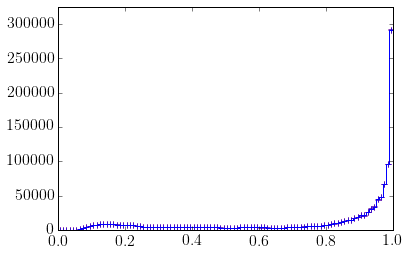

In [77]:
heplot.barhist(h1, color="red")
heplot.barhist(h2, color="blue")

In [52]:
ROOT.gROOT.cd()
tfs[1].Get("tree_b").Draw("bd_csv2:bd_csv1 >> hb(20,0,1,20,0,1)", "abs(flavour)==5 && abs(bd_csv1-bd_csv2)>0.00001")

638831L

In [53]:
hb = ROOT.gROOT.Get("hb")

In [54]:
def get_mat(h):
    nx = h.GetNbinsX()
    ny = h.GetNbinsY()
    arr = np.zeros((h.GetNbinsX(), h.GetNbinsY()))
    for i in range(nx):
        for j in range(ny):
            arr[i,j] = h.GetBinContent(i+1,j+1)
    return arr

In [55]:
hb.GetCorrelationFactor()

0.011315835758996492

In [56]:
arr = get_mat(hb)

In [57]:
def draw_corr(h, _title):
    arr1 = get_mat(h)
    plt.figure(figsize=(8,8))
    plt.imshow(arr1, extent=[0,1,0,1], norm=LogNorm(vmin=1, vmax=np.max(arr1)), origin="lower", interpolation="none")
    plt.colorbar()
    plt.xlabel("CSV IVF", fontsize=16)
    plt.ylabel("CSV AVR", fontsize=16)
    c = h.GetCorrelationFactor()
    plt.title(_title + " corr={0:.2f}".format(c), fontsize=20)

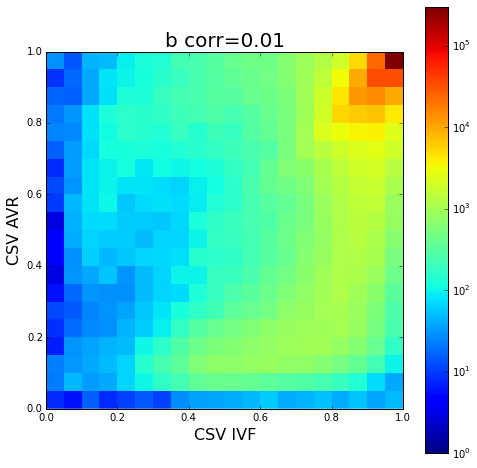

In [58]:
draw_corr(hb, "b")

In [17]:
ROOT.gROOT.cd()
tfs[0].Get("tree").Draw("abs(eta):pt >> h_pt_eta_b(81, 20.0, 820.0, 21, 0.0, 2.5)", "abs(flavour)==5")
tfs[0].Get("tree").Draw("abs(eta):pt >> h_pt_eta_c(81, 20.0, 820.0, 21, 0.0, 2.5)", "abs(flavour)==4")
tfs[0].Get("tree").Draw("abs(eta):pt >> h_pt_eta_l(81, 20.0, 820.0, 21, 0.0, 2.5)", "abs(flavour)!=4 && abs(flavour)!=5")

13464039L

In [18]:
hb = ROOT.gROOT.Get("h_pt_eta_b")
hc = ROOT.gROOT.Get("h_pt_eta_c")
hl = ROOT.gROOT.Get("h_pt_eta_l")

In [19]:
hb.Integral()

7669951.0

In [22]:
def draw_pt_eta(h, _title):
    arr1 = get_mat(h)
    plt.figure(figsize=(8,8))
    plt.imshow(arr1, aspect="auto", extent=[20,820,0,2.5], norm=LogNorm(vmin=100, vmax=np.max(arr1)), origin="lower", interpolation="none")
    plt.colorbar()
    plt.xlabel("pt", fontsize=16)
    plt.ylabel("eta", fontsize=16)
    c = h.GetCorrelationFactor()
    plt.title(_title + " corr={0:.2f}".format(c), fontsize=20)

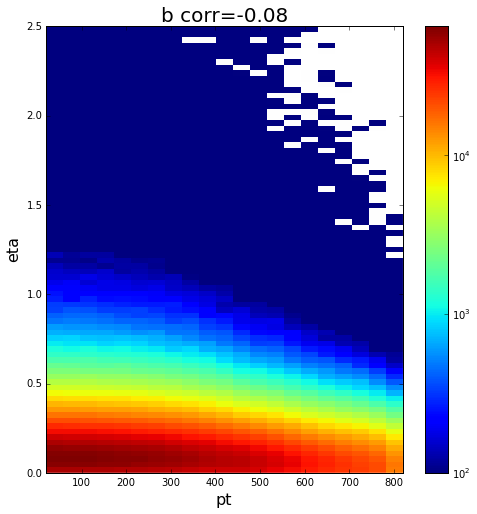

In [23]:
draw_pt_eta(hb, "b")

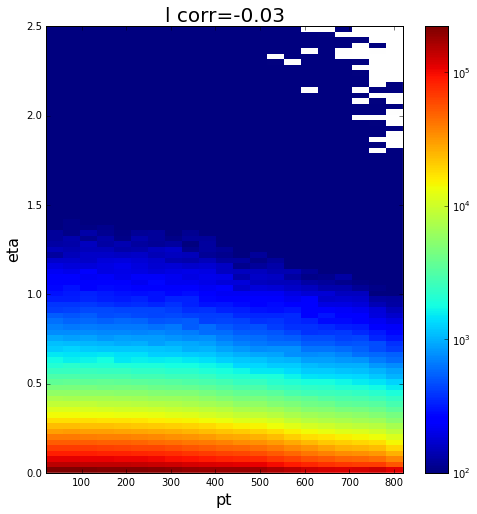

In [24]:
draw_pt_eta(hl, "l")

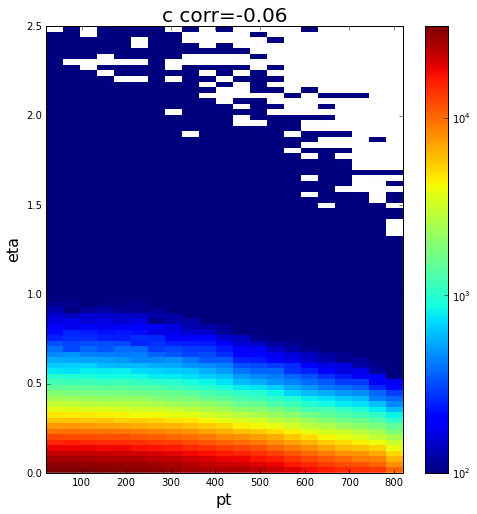

In [25]:
draw_pt_eta(hc, "c")

In [ ]:
*        0 * 41.526565 *
*        1 * 40.942783 *
*        2 * 40.690898 *
*        3 * 40.077396 *
*        4 * 41.067020 *
*        5 * 40.707130 *

*        0 * 40.953834 *
*        1 * 41.675479 *
*        2 * 40.501377 *
*        3 * 40.412941 *
*        4 * 41.557384 *
*        5 * 40.231853 *